In [1]:
import sys
sys.path.append("../lropy")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from lropy.analysis.io import load_simulation_results, load_walltime_duration, pos_names
from lropy.analysis.plotting import format_plot

In [4]:
results_dir = "../results/regression"

In [5]:
t_cannonball_new = [load_walltime_duration(f"{results_dir}/cannonball_new/{i}") for i in range(5)]
t_paneled_new = [load_walltime_duration(f"{results_dir}/paneled_new/{i}") for i in range(5)]
t_cannonball_old = [load_walltime_duration(f"{results_dir}/cannonball_old/{i}") for i in range(5)]
t_paneled_old = [load_walltime_duration(f"{results_dir}/paneled_old/{i}") for i in range(5)]

In [6]:
df_cannonball_new = load_simulation_results(f"{results_dir}/cannonball_new/0")
df_paneled_new = load_simulation_results(f"{results_dir}/paneled_new/0")
df_cannonball_old = load_simulation_results(f"{results_dir}/cannonball_old/0")
df_paneled_old = load_simulation_results(f"{results_dir}/paneled_old/0")

In [7]:
def mean_diff_rel(ref, new):
    # return (2 * (new - ref) / (new + ref)).mean()
    idx = np.nonzero(ref > 1e-15)[0]
    return ((new[idx] - ref[idx]) / ref[idx]).mean()

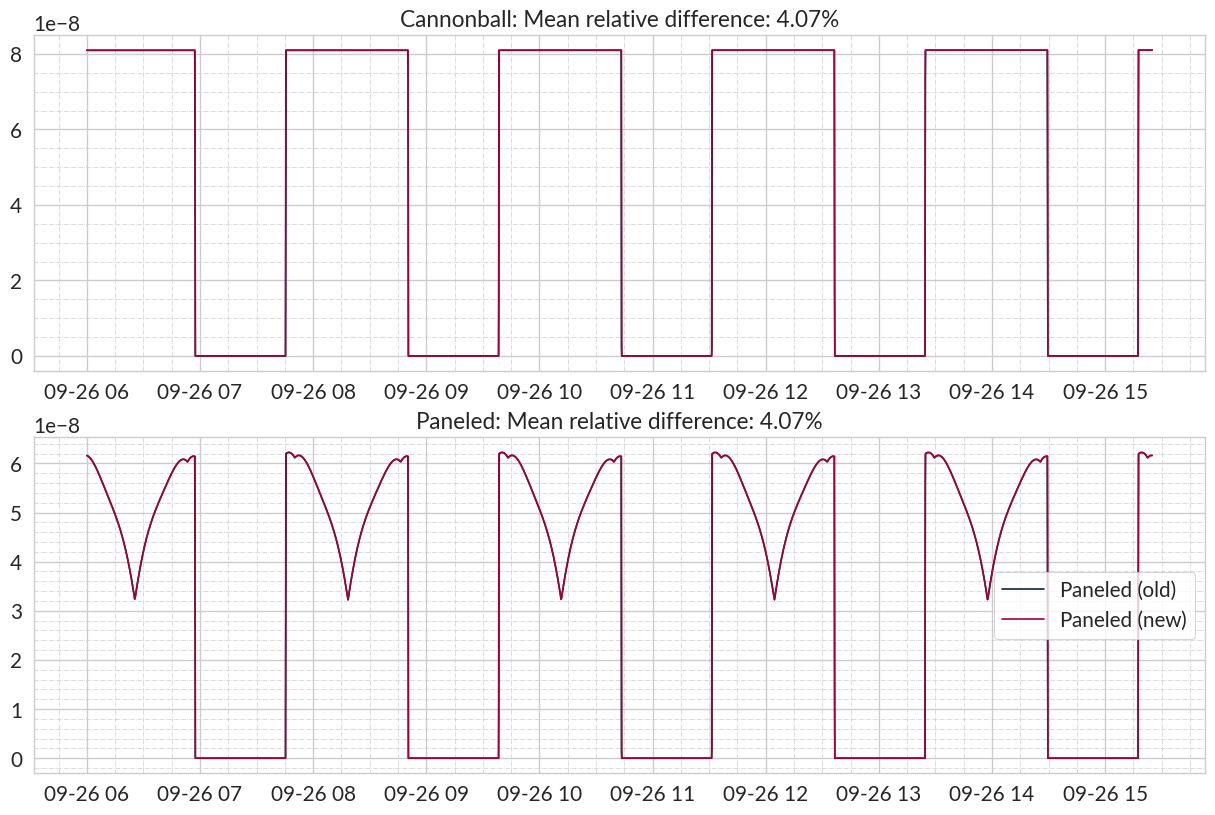

In [14]:
def plot_acc():
    fig, (ax_cannonball, ax_paneled) = plt.subplots(2, figsize=(12, 8))

    ax_cannonball.plot(df_cannonball_old.index, df_cannonball_old["acc_rp_sun"], label="Cannonball (old)")
    ax_cannonball.plot(df_cannonball_new.index, df_cannonball_new["acc_rp_sun"], label="Cannonball (new)")

    acc_diff_rel = mean_diff_rel(df_cannonball_old["acc_rp_sun"], df_cannonball_new["acc_rp_sun"])
    ax_cannonball.set_title(f"Cannonball: Mean relative difference: {acc_diff_rel:.2%}")

    ax_paneled.plot(df_paneled_old.index, df_paneled_old["acc_rp_sun"], label="Paneled (old)")
    ax_paneled.plot(df_paneled_new.index, df_paneled_new["acc_rp_sun"], label="Paneled (new)")

    acc_diff_rel = mean_diff_rel(df_paneled_old["acc_rp_sun"], df_paneled_new["acc_rp_sun"])
    ax_paneled.set_title(f"Paneled: xMean relative difference: {acc_diff_rel:.2%}")

    plt.legend();

    format_plot()

plot_acc()

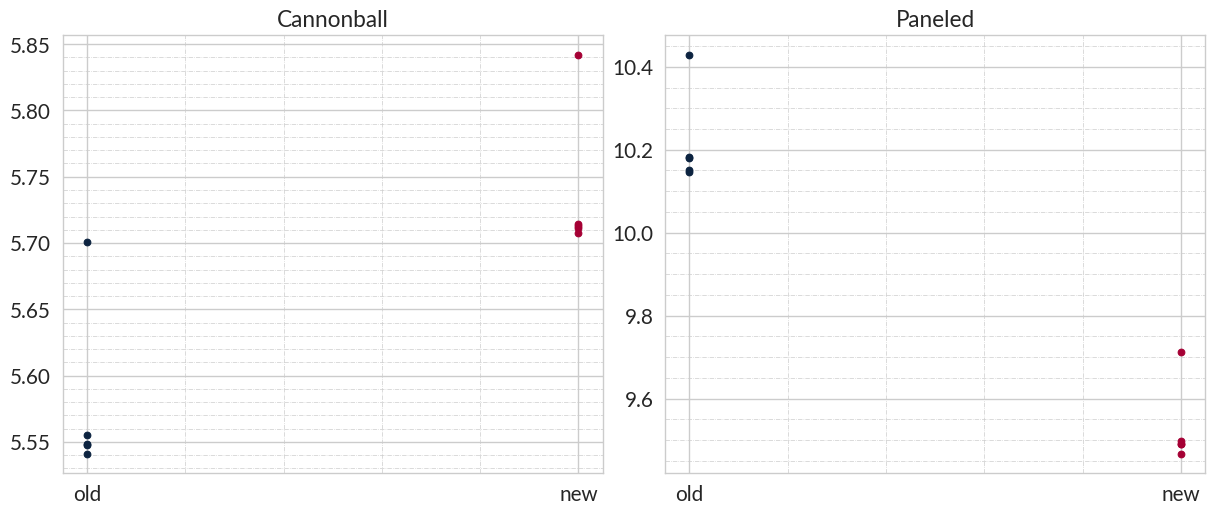

In [13]:
def plot_walltime():
    f, (ax_cannonball, ax_paneled) = plt.subplots(1, 2, figsize=(12, 5))

    ax_cannonball.scatter(x=["old"] * 5, y=t_cannonball_old)
    ax_cannonball.scatter(x=["new"] * 5, y=t_cannonball_new)
    ax_cannonball.set_title("Cannonball")

    ax_paneled.scatter(x=["old"] * 5, y=t_paneled_old)
    ax_paneled.scatter(x=["new"] * 5, y=t_paneled_new)
    ax_paneled.set_title("Paneled")

    format_plot()

plot_walltime()

In [10]:
old, new = df_cannonball_old["acc_rp_sun"].to_numpy(), df_cannonball_new["acc_rp_sun"].to_numpy()

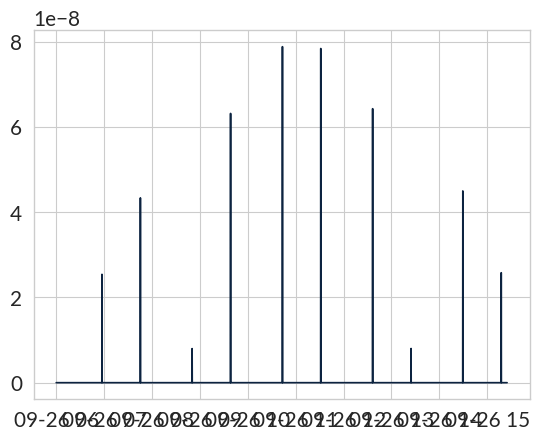

In [11]:
plt.plot(df_cannonball_old.index, new - old)

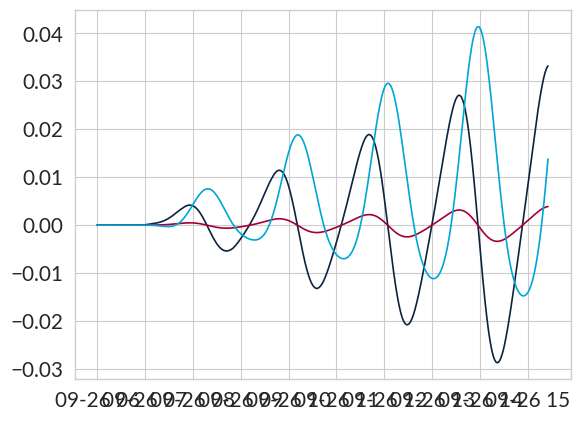

In [12]:
pos = df_cannonball_new[["pos_x", "pos_y", "pos_z"]] - df_cannonball_old[["pos_x", "pos_y", "pos_z"]]

plt.plot(pos.index, pos["pos_x"])
plt.plot(pos.index, pos["pos_y"])
plt.plot(pos.index, pos["pos_z"])